# WeatherPy

# Imports

In [36]:
# Dependencies and Setup

# Visualizations
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
# Requests
import requests
import time
from pprint import pprint

# Regression
from scipy.stats import linregress
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

In [4]:
cities[0:10]

['vaini',
 'albany',
 'isangel',
 'ushuaia',
 'barrow',
 'ust-kut',
 'torbat-e jam',
 'san patricio',
 'kropotkin',
 'saint-georges']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# let see how the API data look like for the first city int he list:

units = "imperial"
city = cities[1]
print(city)


# url =f"http://api.openweathermap.org/data/2.5/weather?q={city}&units={units}&appid={weather_api_key}"
# response = requests.get(url)
# data = response.json()
# pprint(data)

albany


In [10]:
url =f"http://api.openweathermap.org/data/2.5/weather?q={city}&units={units}&appid={weather_api_key}"
response = requests.get(url)
data = response.json()
pprint(data)

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': -3.8, 'lon': 102.27},
 'dt': 1604950605,
 'id': 1649150,
 'main': {'feels_like': 82.13,
          'grnd_level': 1006,
          'humidity': 81,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 75.92,
          'temp_max': 75.92,
          'temp_min': 75.92},
 'name': 'Bengkulu',
 'sys': {'country': 'ID', 'sunrise': 1604962002, 'sunset': 1605006185},
 'timezone': 25200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 66, 'speed': 2.21}}


In [11]:
lats = []
longs = []
temps = []
feel_likes = []
humids = []
pressures = []
speeds = []
cloudiness = []
cities_found = []

for i in range(len(cities)):
    #get the city:
    city = cities[i]
    
    #create the url:
    units = "imperial"
    url =f"http://api.openweathermap.org/data/2.5/weather?q={city}&units={units}&appid={weather_api_key}"
    
    #make the request:
    response = requests.get(url)
    
    #error check:
    if response.status_code ==200:
        data = response.json()
        
        #extract and save the data
        try:
            lat = data['coord']['lat']
            long = data['coord']['lon']
            temp = data['main']['temp']
            feels_like = data['main']['feels_like']
            humid = data['main']['humidity']
            pressure = data['main']['pressure']
            speed = data['wind']['speed']
            clouds = data['clouds']['all']
            city_name = data['name']
            
            lats.append(lat)
            longs.append(long)
            temps.append(temp)
            feel_likes.append(feels_like)
            humids.append(humid)
            pressures.append(pressure)
            speeds.append(speed)
            cloudiness.append(clouds)
            cities_found.append(city_name)
            
        except Exception as e:
            print(f'Through exception for city {city}: {e}')
            
    elif response.status_code == 404:
        print(f"Missing data in OpenWeather API for {city}")
        
    else: 
        print(response.status_code)
        print('API is broken for {city}')
        
    #test print for every 5
    if (i % 5 ==0):
        print(f'Got the data for city index: {i} of {len(cities)}')
    #sleep for requests:
    time.sleep(1)
    


Got the data for city index: 0 of 621
Got the data for city index: 5 of 621
Missing data in OpenWeather API for ituni
Got the data for city index: 10 of 621
Missing data in OpenWeather API for tsihombe
Got the data for city index: 15 of 621
Got the data for city index: 20 of 621
Got the data for city index: 25 of 621
Got the data for city index: 30 of 621
Missing data in OpenWeather API for attawapiskat
Got the data for city index: 35 of 621
Missing data in OpenWeather API for jiddah
Got the data for city index: 40 of 621
Got the data for city index: 45 of 621
Missing data in OpenWeather API for barentsburg
Got the data for city index: 50 of 621
Missing data in OpenWeather API for taolanaro
Got the data for city index: 55 of 621
Got the data for city index: 60 of 621
Got the data for city index: 65 of 621
Got the data for city index: 70 of 621
Got the data for city index: 75 of 621
Missing data in OpenWeather API for nam tha
Got the data for city index: 80 of 621
Got the data for city 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
df = pd.DataFrame()
df["City"] = cities_found
df["Latitude"] = lats
df["Longitude"] = longs
df["Temperature"] = temps
df["Feels Like"] = feel_likes
df["Humidity"] = humids
df["Pressure"] = pressures
df["Wind Speed"] = speeds
df["Cloudiness"] = cloudiness
df.head(10)

,City,Latitude,Longitude,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness
0,Rome,43.21,-75.46,72.00,68.14,31,1024,2.80,1
1,Bengkulu,-3.80,102.27,75.92,82.13,81,1009,2.21,92
2,Punta Arenas,-53.15,-70.92,51.80,42.94,71,1008,12.75,75
3,Karratha,-20.74,116.85,65.71,61.59,68,1012,10.00,0
4,Ancud,-41.87,-73.82,65.05,58.55,52,1021,10.29,0
5,Severo-Kuril'sk,50.68,156.12,37.81,20.82,80,992,23.87,100
6,Chokurdakh,70.63,147.92,-17.90,-26.32,90,1020,2.77,57
7,Hermanus,-34.42,19.23,54.00,49.23,78,1031,7.38,65
8,Hobart,-42.88,147.33,52.27,47.17,76,1019,6.93,0
9,Busselton,-33.65,115.33,46.36,34.03,98,1000,20.18,42


In [13]:
df.shape

(562, 9)

In [17]:
 df.to_csv(output_data_file, index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [37]:
# to avoid rerunning the loop, the below code loads the output data:

file_path = "output_data/cities.csv"
df = pd.read_csv(file_path)
df

,City,Latitude,Longitude,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness
0,Rome,43.21,-75.46,72.00,68.14,31,1024,2.80,1
1,Bengkulu,-3.80,102.27,75.92,82.13,81,1009,2.21,92
2,Punta Arenas,-53.15,-70.92,51.80,42.94,71,1008,12.75,75
3,Karratha,-20.74,116.85,65.71,61.59,68,1012,10.00,0
4,Ancud,-41.87,-73.82,65.05,58.55,52,1021,10.29,0
...,...,...,...,...,...,...,...,...,...
557,Twentynine Palms,34.14,-116.05,53.20,42.26,25,1021,10.29,1
558,Meulaboh,4.14,96.13,76.77,84.25,88,1009,3.00,93
559,Seminole,28.71,-81.21,76.62,77.77,94,1012,16.11,90
560,Kalabo,-14.97,22.68,79.02,76.91,41,1008,5.55,51


In [38]:
df.shape

(562, 9)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         562 non-null    object 
 1   Latitude     562 non-null    float64
 2   Longitude    562 non-null    float64
 3   Temperature  562 non-null    float64
 4   Feels Like   562 non-null    float64
 5   Humidity     562 non-null    int64  
 6   Pressure     562 non-null    int64  
 7   Wind Speed   562 non-null    float64
 8   Cloudiness   562 non-null    int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 39.6+ KB


In [40]:
df.describe()

,Latitude,Longitude,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000
mean,20.299769,20.933488,57.209947,53.618399,72.642349,1013.281139,8.333808,49.491103
std,33.524801,90.283724,24.108427,28.777701,19.288277,17.841128,5.990281,40.586662
min,-54.800000,-179.170000,-25.980000,-35.320000,14.000000,646.000000,0.110000,0.000000
25%,-6.217500,-59.332500,40.050000,32.172500,63.000000,1009.000000,3.945000,1.000000
50%,24.855000,28.285000,64.480000,60.675000,77.000000,1014.000000,6.930000,45.000000
75%,49.100000,101.120000,77.355000,78.645000,86.000000,1020.000000,11.410000,90.000000
max,78.220000,178.420000,96.800000,98.690000,100.000000,1031.000000,37.400000,100.000000


# Some vizzes

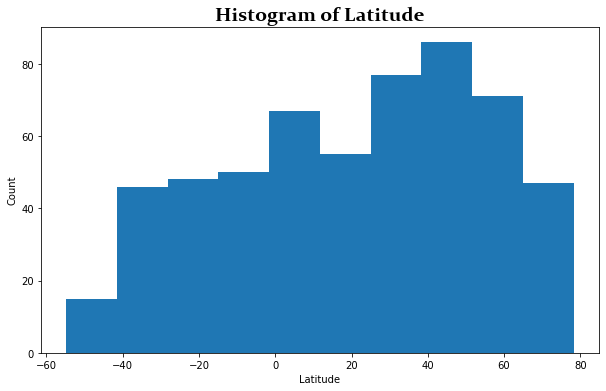

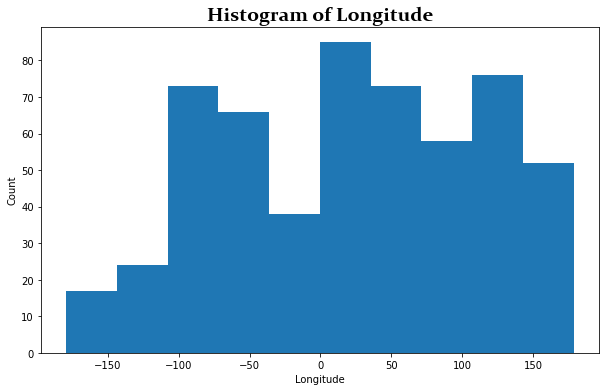

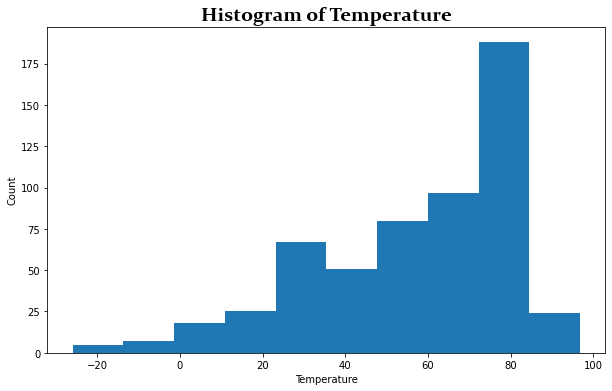

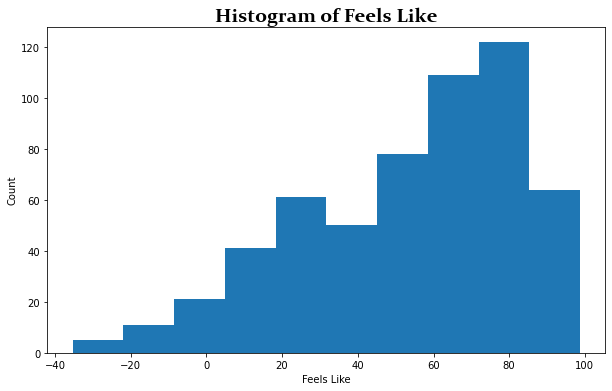

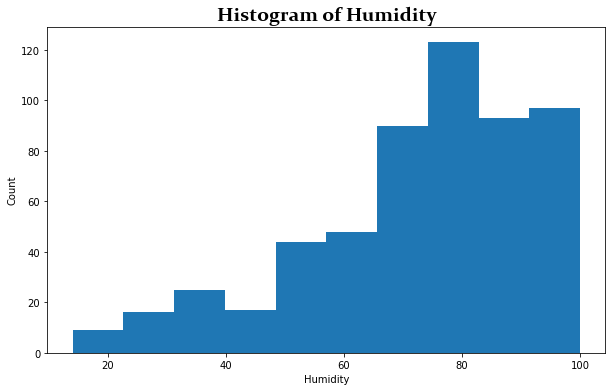

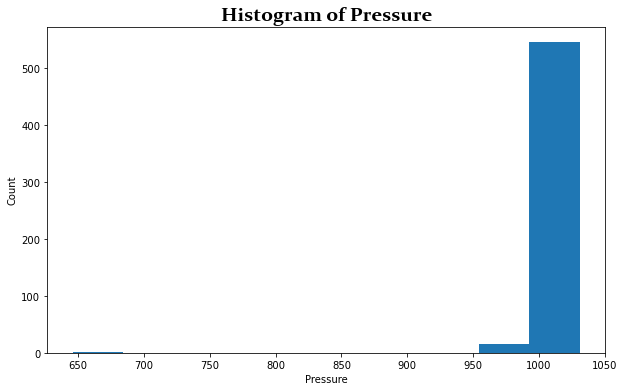

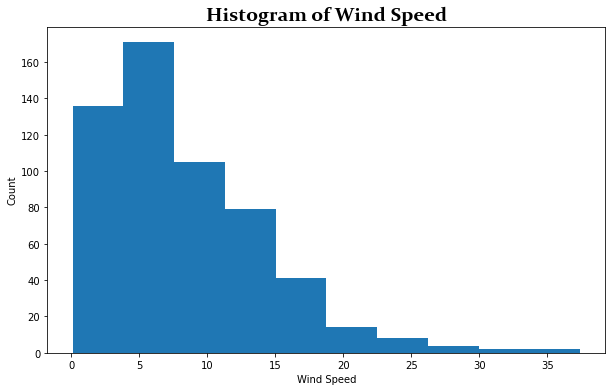

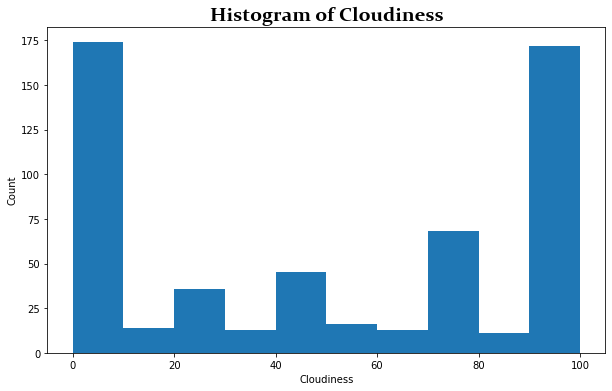

In [41]:
# Histogram of each column
for col in df.columns:
    if(df[col].dtype == np.float64 or df[col].dtype == np.int64):
        plt.figure(figsize =(10,6))
        plt.hist(df[col])
        plt.title(f'Histogram of {col}', fontweight ="bold", fontsize = 20, fontname = "Constantia")
        plt.xlabel(col)
        plt.ylabel("Count")

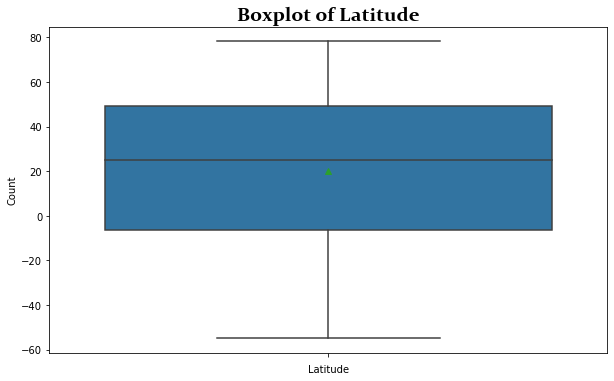

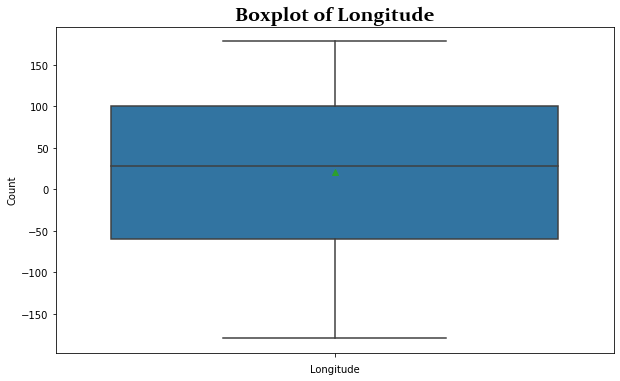

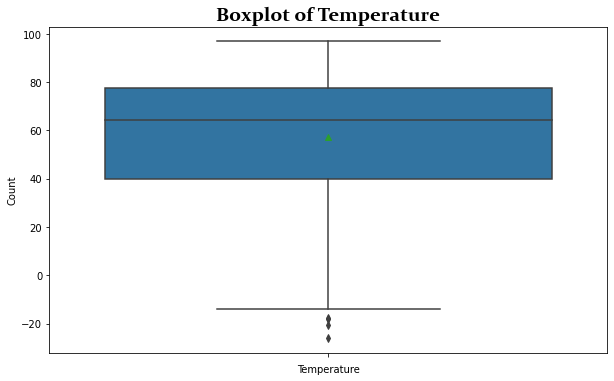

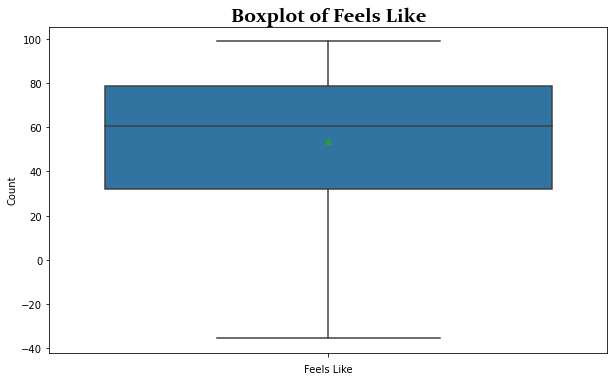

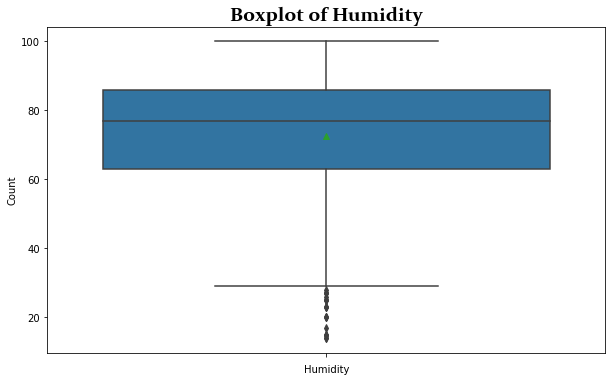

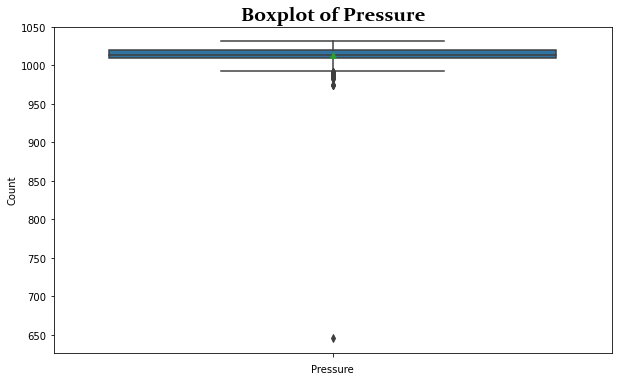

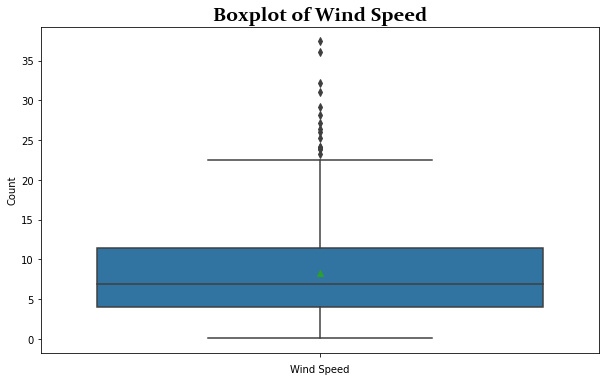

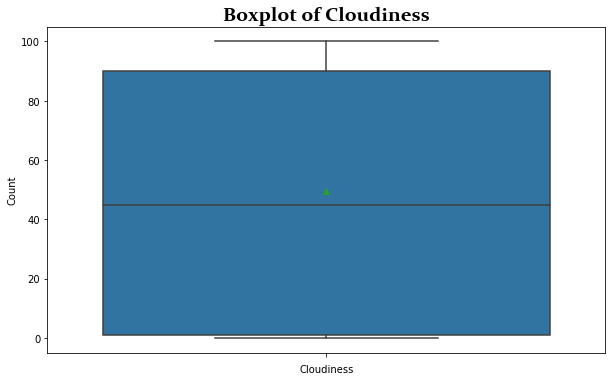

In [7]:
# let see boxplot:
for col in df.columns:
    if(df[col].dtype == np.float64 or df[col].dtype == np.int64):
        plt.figure(figsize =(10,6))
        sns.boxplot(y = col, data = df, showmeans = 'True')
        plt.title(f'Boxplot of {col}', fontweight ="bold", fontsize = 20, fontname = "Constantia")
        plt.xlabel(col)
        plt.ylabel("Count")


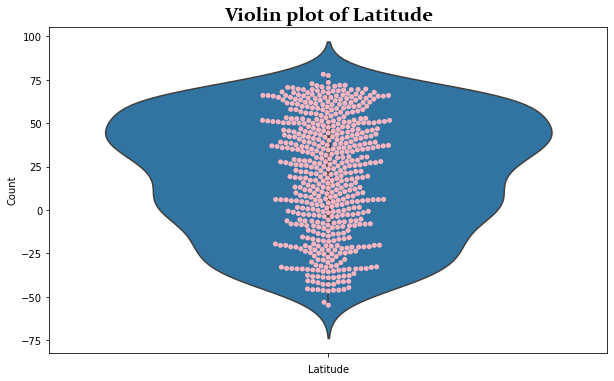

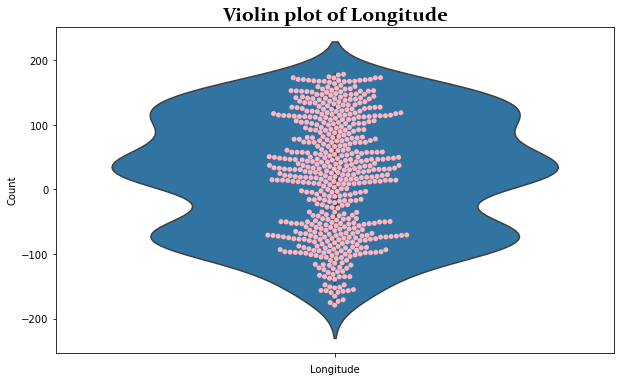

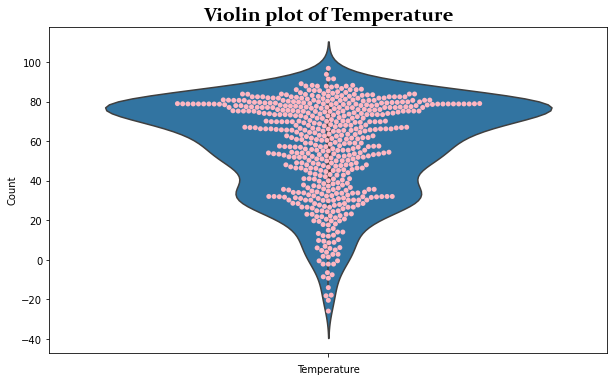

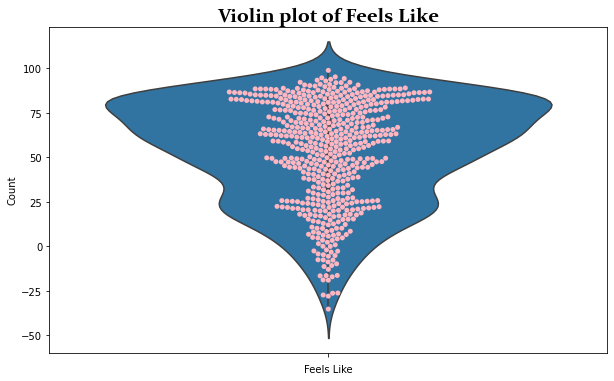

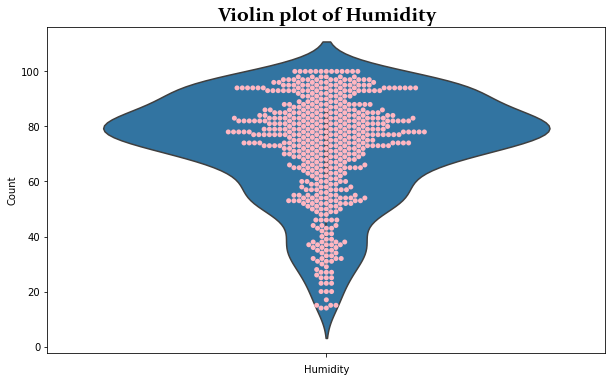

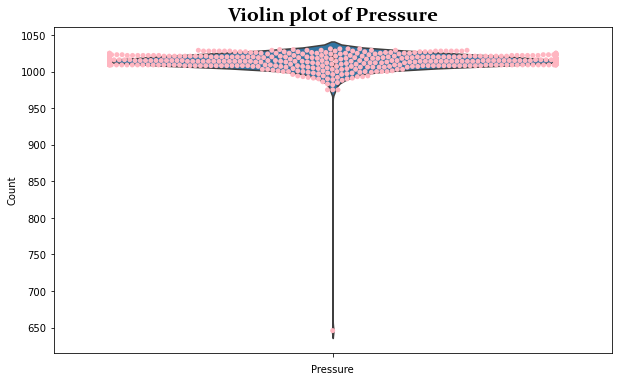

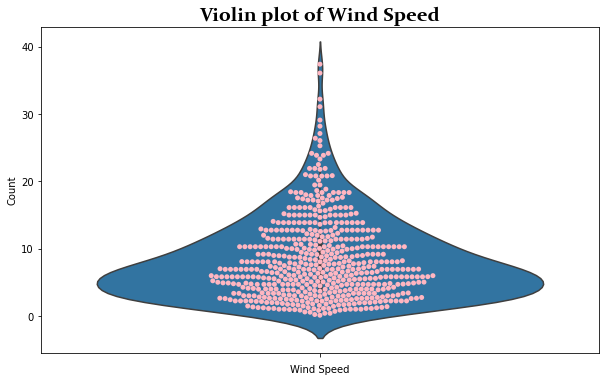

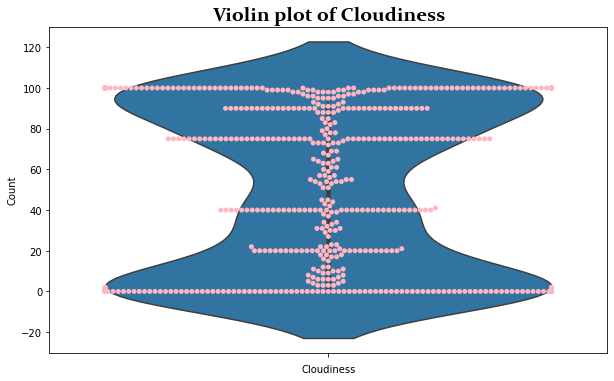

In [42]:
# Do Violin Plot for fun 
for col in df.columns:
    if(df[col].dtype == np.float64 or df[col].dtype == np.int64):
        plt.figure(figsize =(10,6))
        sns.violinplot(y = col, data = df, showmeans ='True')
        sns.swarmplot(y = col, data = df, color='lightpink')
        plt.title(f'Violin plot of {col}', fontweight ="bold", fontsize = 20, fontname = "Constantia")
        plt.xlabel(col)
        plt.ylabel("Count")

In [8]:
#  Get the indices of cities that have humidity over 100%.
# Because max value of Humidity is 100%, no cities have humidity over 100% so we can skip this
df.Humidity.max()

100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

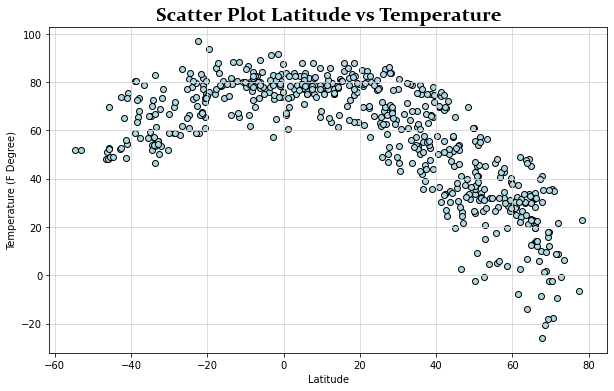

In [43]:
plt.figure(figsize = (10,6))
plt.scatter(df.Latitude, df.Temperature, facecolor = 'lightblue', edgecolor ='black')
plt.title("Scatter Plot Latitude vs Temperature", fontweight ="bold", fontsize = 20, fontname = "Constantia")
plt.xlabel('Latitude')
plt.grid(color= 'lightgrey')
plt.ylabel("Temperature (F Degree)")
plt.show()

## Latitude vs. Humidity Plot

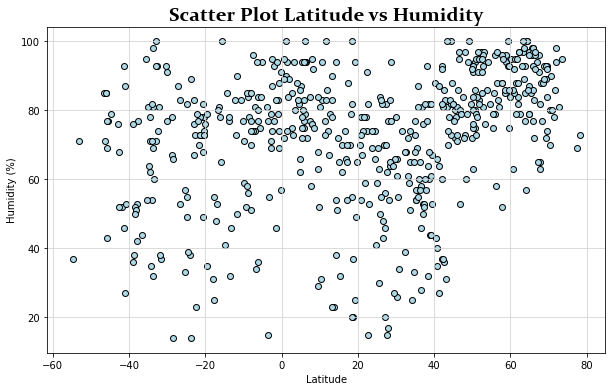

In [44]:
plt.figure(figsize = (10,6))
plt.scatter(df.Latitude, df.Humidity, facecolor = 'lightblue', edgecolor ='black')
plt.title("Scatter Plot Latitude vs Humidity", fontweight ="bold", fontsize = 20, fontname = "Constantia")
plt.xlabel('Latitude')
plt.grid(color= 'lightgrey')
plt.ylabel("Humidity (%)")
plt.show()

## Latitude vs. Cloudiness Plot

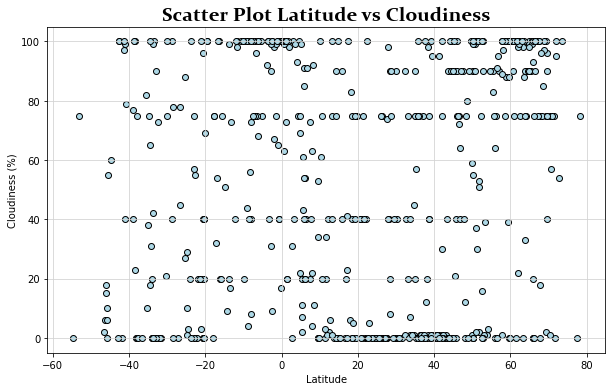

In [45]:
plt.figure(figsize = (10,6))
plt.scatter(df.Latitude, df.Cloudiness, facecolor = 'lightblue', edgecolor ='black')
plt.title("Scatter Plot Latitude vs Cloudiness", fontweight ="bold", fontsize = 20, fontname = "Constantia")
plt.xlabel('Latitude')
plt.grid(color= 'lightgrey')
plt.ylabel("Cloudiness (%)")
plt.show()

## Latitude vs. Wind Speed Plot

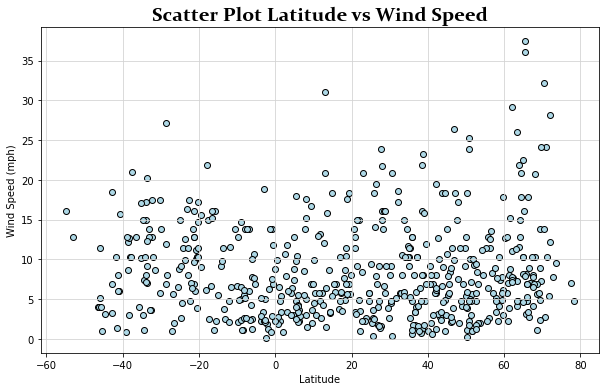

In [46]:
plt.figure(figsize = (10,6))
plt.scatter(df.Latitude, df['Wind Speed'], facecolor = 'lightblue', edgecolor ='black')
plt.title("Scatter Plot Latitude vs Wind Speed", fontweight ="bold", fontsize = 20, fontname = "Constantia")
plt.xlabel('Latitude')
plt.grid(color= 'lightgrey')
plt.ylabel("Wind Speed (mph)")
plt.show()


## Linear Regression

In [47]:
df['Hemisphere_NS'] = ["Northern" if x >0 else "Southern" for x in df.Latitude]
df['Hemisphere_WE'] = ["Eastern" if x >0 else "Western" for x in df.Longitude ]
df.head()

,City,Latitude,Longitude,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness,Hemisphere_NS,Hemisphere_WE
0,Rome,43.21,-75.46,72.00,68.14,31,1024,2.80,1,Northern,Western
1,Bengkulu,-3.80,102.27,75.92,82.13,81,1009,2.21,92,Southern,Eastern
2,Punta Arenas,-53.15,-70.92,51.80,42.94,71,1008,12.75,75,Southern,Western
3,Karratha,-20.74,116.85,65.71,61.59,68,1012,10.00,0,Southern,Eastern
4,Ancud,-41.87,-73.82,65.05,58.55,52,1021,10.29,0,Southern,Western


In [48]:
# See the correlations:
corrs = df.corr()
corrs

,Latitude,Longitude,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness
Latitude,1.000000,-0.142744,-0.659555,-0.654255,0.280995,-0.034348,0.030933,0.124794
Longitude,-0.142744,1.000000,-0.171895,-0.116119,0.257400,-0.017564,-0.331621,-0.098128
Temperature,-0.659555,-0.171895,1.000000,0.986691,-0.408562,0.005966,0.026257,-0.090276
Feels Like,-0.654255,-0.116119,0.986691,1.000000,-0.319859,0.016249,-0.095951,-0.073828
Humidity,0.280995,0.257400,-0.408562,-0.319859,1.000000,0.008539,-0.048821,0.349674
Pressure,-0.034348,-0.017564,0.005966,0.016249,0.008539,1.000000,-0.098898,-0.226301
Wind Speed,0.030933,-0.331621,0.026257,-0.095951,-0.048821,-0.098898,1.000000,0.136518
Cloudiness,0.124794,-0.098128,-0.090276,-0.073828,0.349674,-0.226301,0.136518,1.000000


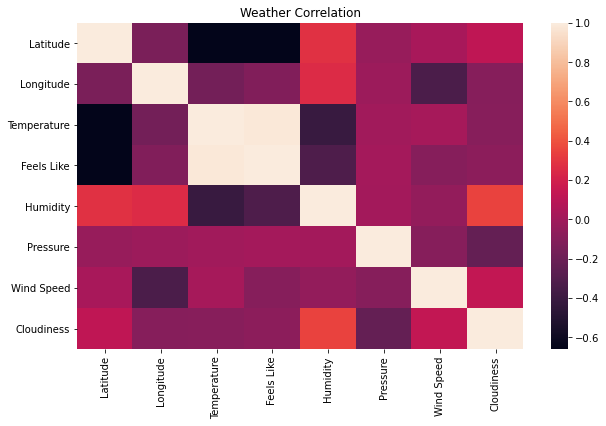

In [49]:
# heatmap:
plt.figure(figsize =(10,6))
sns.heatmap(corrs)
plt.title("Weather Correlation")
plt.show()

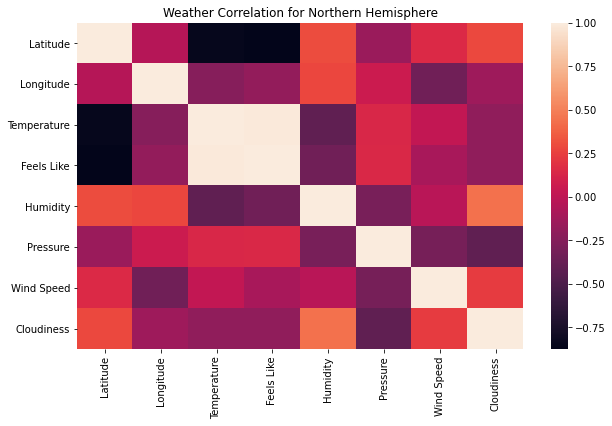

In [50]:
#For Northern Hemisphere only
corrs2 = df.loc[df.Hemisphere_NS=="Northern"].corr()

plt.figure(figsize =(10,6))
sns.heatmap(corrs2)
plt.title("Weather Correlation for Northern Hemisphere")
plt.show()

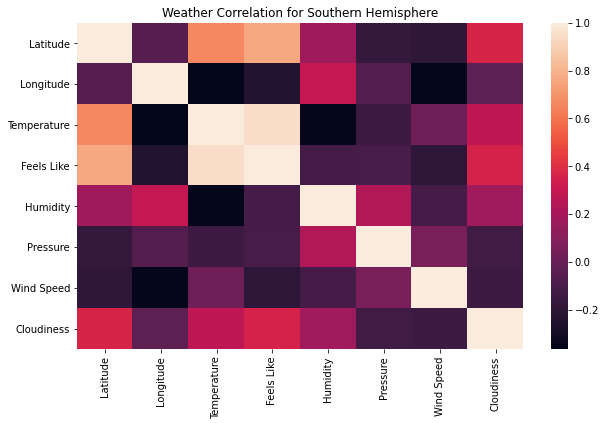

In [51]:
#For Southern Hemisphere only
corrs3 = df.loc[df.Hemisphere_NS=="Southern"].corr()

plt.figure(figsize =(10,6))
sns.heatmap(corrs3)
plt.title("Weather Correlation for Southern Hemisphere")
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [52]:
# statsmodels
df_sub = df.loc[df.Hemisphere_NS=="Northern"]
target = df_sub.Temperature
feature = df_sub.Latitude

X = sm.add_constant(feature)
Y = target
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     985.3
Date:                Sat, 14 Nov 2020   Prob (F-statistic):          6.79e-109
Time:                        12:50:01   Log-Likelihood:                -1584.3
No. Observations:                 393   AIC:                             3173.
Df Residuals:                     391   BIC:                             3180.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         91.4637      1.455     62.862      0.000      88.603      94.324
Latitude      -1.0466      0.033    -31.389      0.000      -1.112      -0.981
==============================================================================
Omnibus:                       11.466   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.752
Skew:                          -0.381   Prob(JB):                      0.00281
Kurtosis:                       3.370   Cond. No.                         92.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# get the regression equation
slope = results.params[1]
intercept = results.params[0]
regression_values = feature*slope + intercept
line_eq ='y = '+str(round(slope,2))+"x + "+str(round(intercept,2))
line_eq

'y = -1.05x + 91.46'

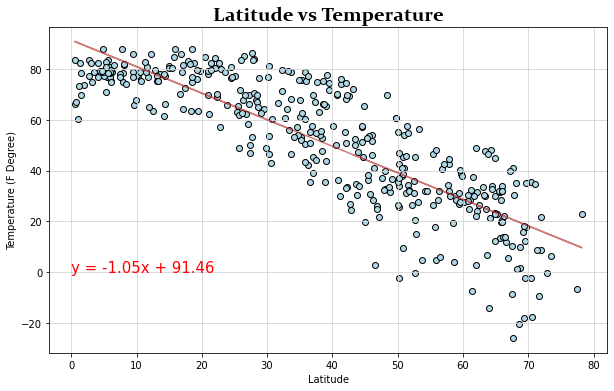

In [54]:
# graph
plt.figure(figsize = (10,6))

plt.scatter(df_sub.Latitude, df_sub.Temperature, facecolor = 'lightblue', edgecolor ='black')
plt.title("Latitude vs Temperature", fontweight ="bold", fontsize = 20, fontname = "Constantia")
plt.xlabel('Latitude')
plt.ylabel("Temperature (F Degree)")
plt.grid(color= 'lightgrey')

plt.plot(feature, regression_values, color = "firebrick", alpha =0.6)
plt.annotate(line_eq,(0,0), fontsize = 15, color= 'r')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

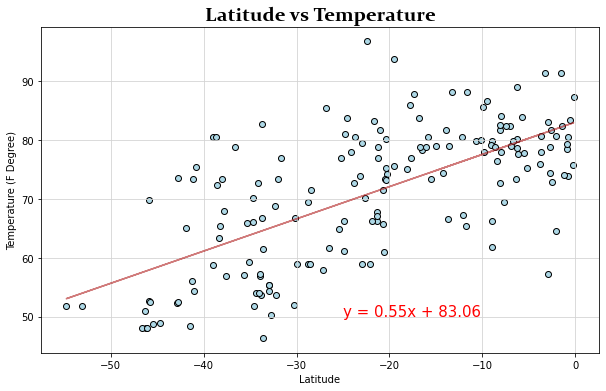

In [55]:
# statsmodels
df_sub = df.loc[df.Hemisphere_NS=="Southern"]
target = df_sub.Temperature
feature = df_sub.Latitude

X = sm.add_constant(feature)
Y = target
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

# get the regression equation
slope = results.params[1]
intercept = results.params[0]
regression_values = feature*slope + intercept
line_eq ='y = '+str(round(slope,2))+"x + "+str(round(intercept,2))

# graph
plt.figure(figsize = (10,6))
plt.scatter(df_sub.Latitude, df_sub.Temperature, facecolor = 'lightblue', edgecolor ='black')
plt.title("Latitude vs Temperature", fontweight ="bold", fontsize = 20, fontname = "Constantia")
plt.xlabel('Latitude')
plt.ylabel("Temperature (F Degree)")
plt.grid(color= 'lightgrey')

plt.plot(feature, regression_values, color = "firebrick", alpha =0.6)
plt.annotate(line_eq,(-25,50), fontsize = 15, color= 'r')
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

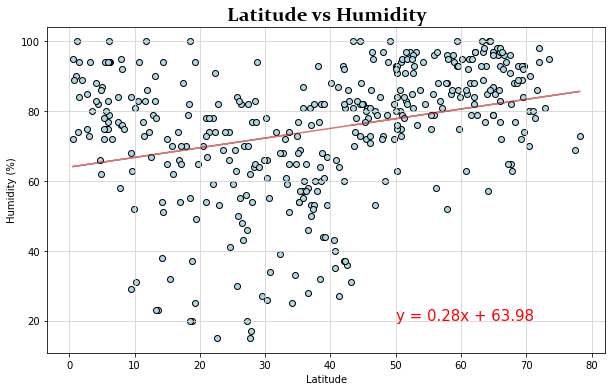

In [56]:
# statsmodels
df_sub = df.loc[df.Hemisphere_NS=="Northern"]
target = df_sub.Humidity
feature = df_sub.Latitude

X = sm.add_constant(feature)
Y = target
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

# get the regression equation
slope = results.params[1]
intercept = results.params[0]
regression_values = feature*slope + intercept
line_eq ='y = '+str(round(slope,2))+"x + "+str(round(intercept,2))

# graph
plt.figure(figsize = (10,6))
plt.scatter(df_sub.Latitude, df_sub.Humidity, facecolor = 'lightblue', edgecolor ='black')
plt.title("Latitude vs Humidity", fontweight ="bold", fontsize = 20, fontname = "Constantia")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.grid(color= 'lightgrey')

plt.plot(feature, regression_values, color = "firebrick", alpha =0.6)
plt.annotate(line_eq,(50, 20), fontsize = 15, color= 'r')
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

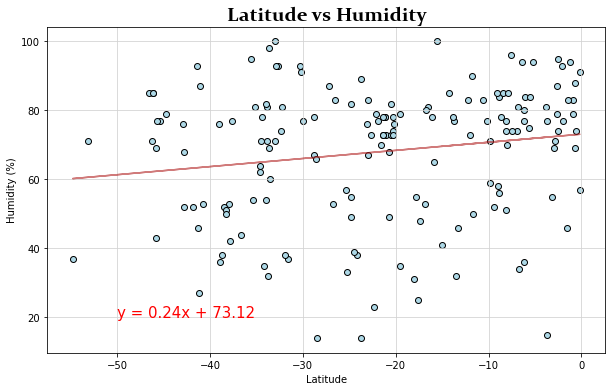

In [57]:
# statsmodels
df_sub = df.loc[df.Hemisphere_NS=="Southern"]
target = df_sub.Humidity
feature = df_sub.Latitude

X = sm.add_constant(feature)
Y = target
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

# get the regression equation
slope = results.params[1]
intercept = results.params[0]
regression_values = feature*slope + intercept
line_eq ='y = '+str(round(slope,2))+"x + "+str(round(intercept,2))

# graph
plt.figure(figsize = (10,6))
plt.scatter(df_sub.Latitude, df_sub.Humidity, facecolor = 'lightblue', edgecolor ='black')
plt.title("Latitude vs Humidity", fontweight ="bold", fontsize = 20, fontname = "Constantia")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.grid(color= 'lightgrey')

plt.plot(feature, regression_values, color = "firebrick", alpha =0.6)
plt.annotate(line_eq,(-50, 20), fontsize = 15, color= 'r')
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

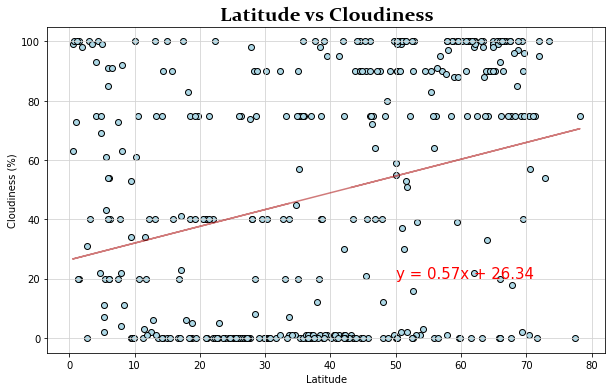

In [59]:
# statsmodels
df_sub = df.loc[df.Hemisphere_NS=="Northern"]
target = df_sub.Cloudiness
feature = df_sub.Latitude

X = sm.add_constant(feature)
Y = target
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

# get the regression equation
slope = results.params[1]
intercept = results.params[0]
regression_values = feature*slope + intercept
line_eq ='y = '+str(round(slope,2))+"x + "+str(round(intercept,2))

# graph
plt.figure(figsize = (10,6))
plt.scatter(df_sub.Latitude, df_sub.Cloudiness, facecolor = 'lightblue', edgecolor ='black')
plt.title("Latitude vs Cloudiness", fontweight ="bold", fontsize = 20, fontname = "Constantia")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.grid(color= 'lightgrey')

plt.plot(feature, regression_values, color = "firebrick", alpha =0.6)
plt.annotate(line_eq,(50, 20), fontsize = 15, color= 'r')
plt.show()

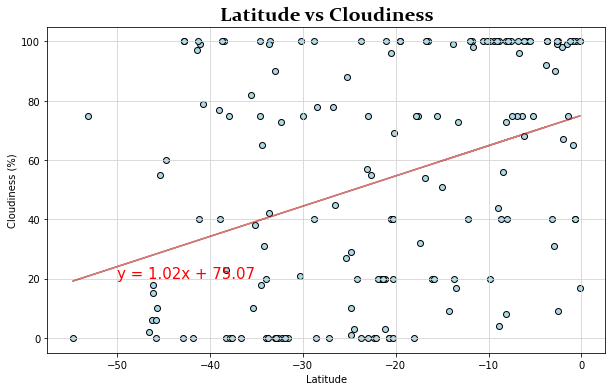

In [65]:
# statsmodels
df_sub = df.loc[df.Hemisphere_NS=="Southern"]
target = df_sub.Cloudiness
feature = df_sub.Latitude

X = sm.add_constant(feature)
Y = target
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

# get the regression equation
slope = results.params[1]
intercept = results.params[0]
regression_values = feature*slope + intercept
line_eq ='y = '+str(round(slope,2))+"x + "+str(round(intercept,2))

# graph
plt.figure(figsize = (10,6))
plt.scatter(df_sub.Latitude, df_sub.Cloudiness, facecolor = 'lightblue', edgecolor ='black')
plt.title("Latitude vs Cloudiness", fontweight ="bold", fontsize = 20, fontname = "Constantia")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.grid(color= 'lightgrey')

plt.plot(feature, regression_values, color = "firebrick", alpha =0.6)
plt.annotate(line_eq,(-50,20), fontsize = 15, color= 'r')
plt.show()



##  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


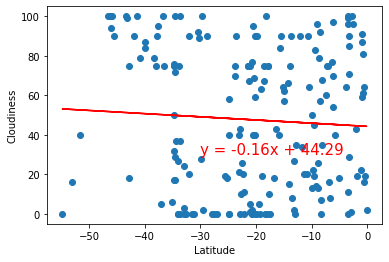

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


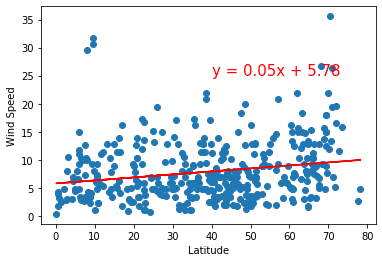

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


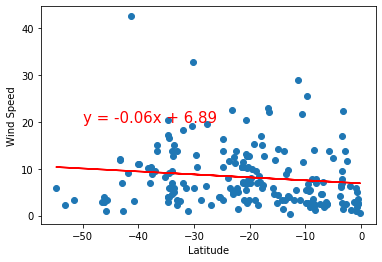